# Importing Libraries

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Reading input file

In [14]:
df = pd.read_csv('/content/Car_data.csv')
df.fillna(df.mean(), inplace=True)
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# Regression Model

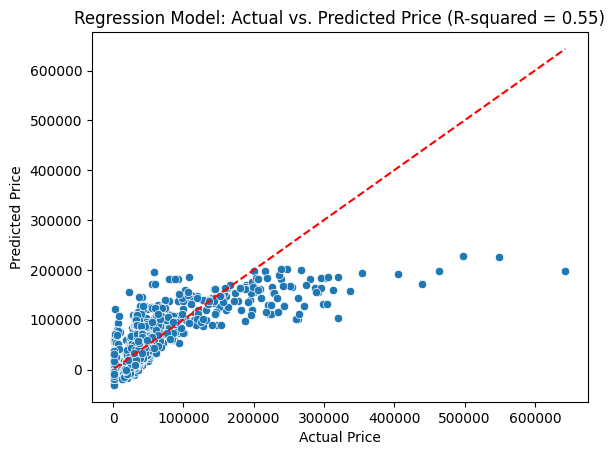

In [35]:
X = df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']]
y = df['MSRP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
reg_model = LinearRegression()

# Fit the model to the training data
reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Calculate the R-squared value
r2 = reg_model.score(X_test, y_test)

# Create a scatter plot with a trendline
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression Model: Actual vs. Predicted Price (R-squared = {:.2f})'.format(r2))
plt.show()

# Sensitivity analysis

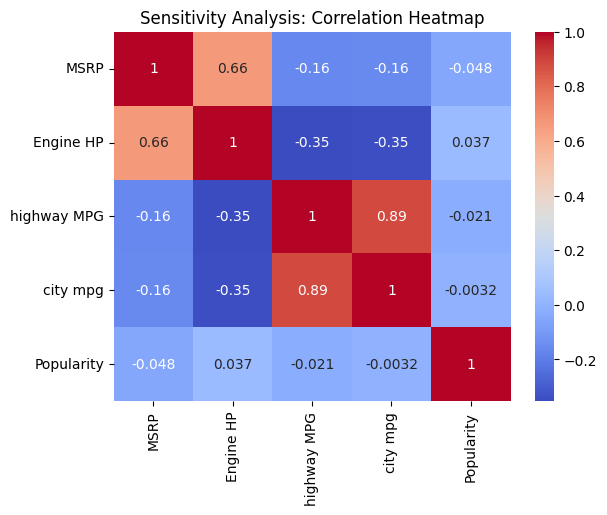

In [34]:
columns = ['MSRP', 'Engine HP', 'highway MPG', 'city mpg', 'Popularity']
df_sensitivity = df[columns]

# Perform sensitivity analysis using correlation matrix
corr_matrix = df_sensitivity.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Sensitivity Analysis: Correlation Heatmap')
plt.show()

# Develop an optimization model

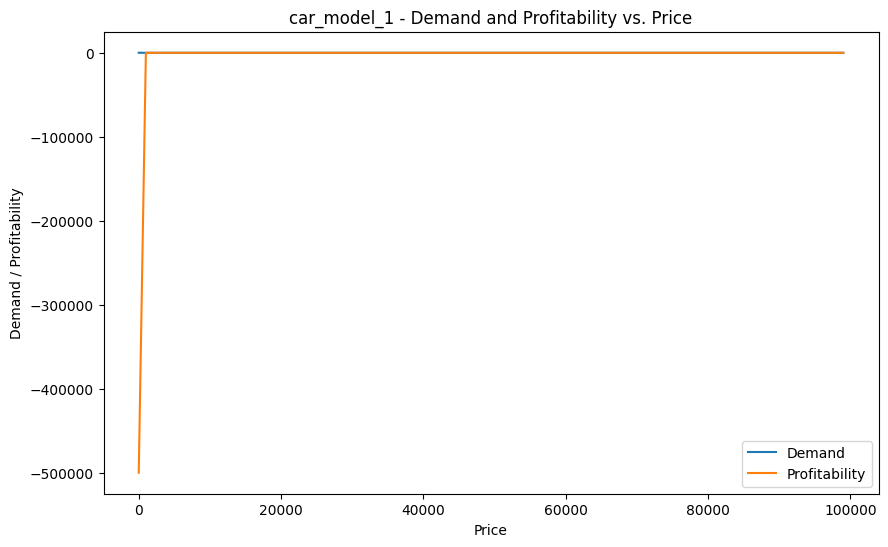

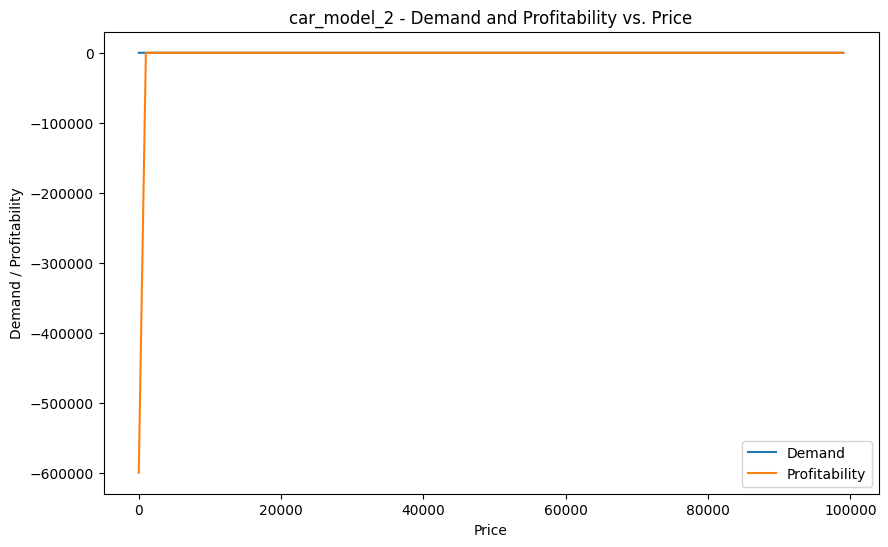

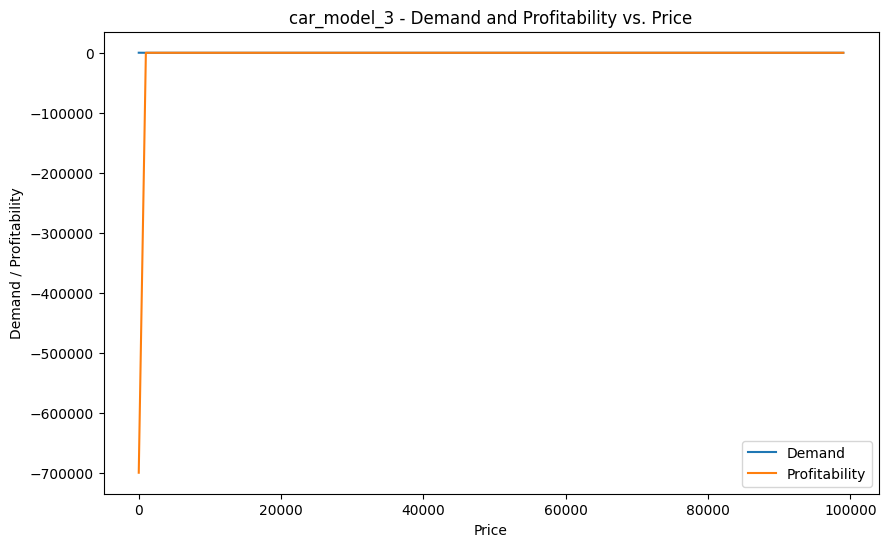

In [29]:
manufacturing_costs = {'car_model_1': 5000, 'car_model_2': 6000, 'car_model_3': 7000}

# Function to calculate demand based on car features and price
def calculate_demand(car_model, price):
    demand = max(0, 100 - 0.1 * price)
    return demand

# Calculate profitability for each car model at different price points
for car_model in manufacturing_costs.keys():
    cost = manufacturing_costs[car_model]
    
    # Filter the dataset to include only the rows with the current car model
    car_df = df[df['Vehicle Style'] == car_model]
    
    # Create empty lists to store price, demand, and profitability
    prices = []
    demands = []
    profitabilities = []
    
    # Iterate through different price points
    for price in range(0, 100000, 1000):  
        demand = calculate_demand(car_model, price)
        
        # Calculate profitability using the formula: (Price - Cost) * Demand
        profitability = (price - cost) * demand
        
        # Append price, demand, and profitability to the lists
        prices.append(price)
        demands.append(demand)
        profitabilities.append(profitability)
    
    # Create a DataFrame to store the results
    result_df = pd.DataFrame({'Price': prices, 'Demand': demands, 'Profitability': profitabilities})
    
    # Plot the results in a line chart
    plt.figure(figsize=(10, 6))
    plt.plot(result_df['Price'], result_df['Demand'], label='Demand')
    plt.plot(result_df['Price'], result_df['Profitability'], label='Profitability')
    plt.xlabel('Price')
    plt.ylabel('Demand / Profitability')
    plt.title(f'{car_model} - Demand and Profitability vs. Price')
    plt.legend()
    plt.show()

# Time series analysis

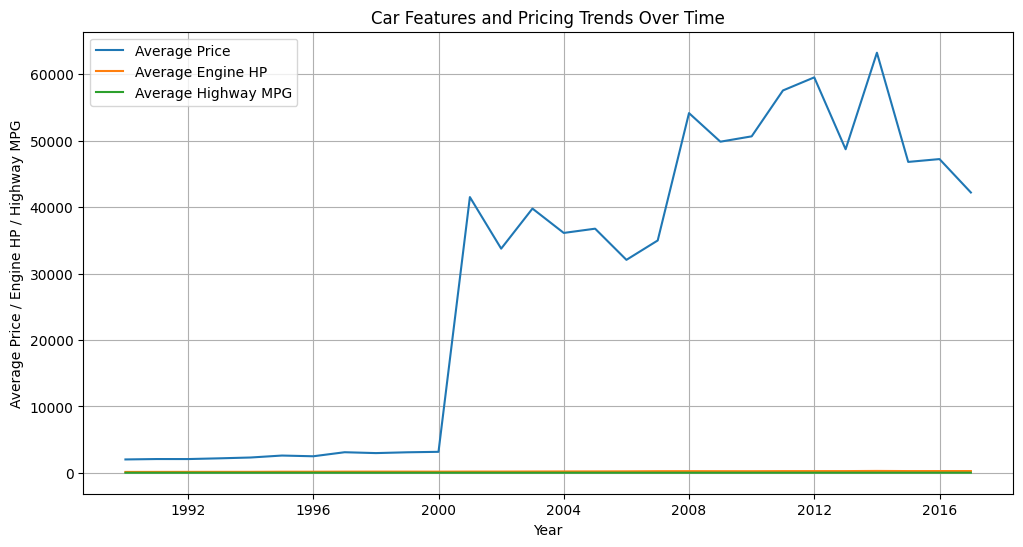

In [32]:
# Convert the "Year" column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Create a pivot table to calculate average price and features by year
pivot_table = df.pivot_table(index='Year', values=['MSRP', 'Engine HP', 'highway MPG'], aggfunc='mean')

# Extract average price, engine HP, and highway MPG
avg_price = pivot_table['MSRP']
avg_engine_hp = pivot_table['Engine HP']
avg_highway_mpg = pivot_table['highway MPG']

# Create a line chart to visualize the trends
plt.figure(figsize=(12, 6))
plt.plot(avg_price, label='Average Price')
plt.plot(avg_engine_hp, label='Average Engine HP')
plt.plot(avg_highway_mpg, label='Average Highway MPG')
plt.xlabel('Year')
plt.ylabel('Average Price / Engine HP / Highway MPG')
plt.title('Car Features and Pricing Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()